# Regression between sea level height and the nearest wind stress data point for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point is used to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [113]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf

data_type = 'era5'
model = 'NearestPoint'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [114]:
# Open data file
tg_data = imprt.import_obs_slh_data()

In [115]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.324982,-14.301278,-9.082765,-13.170729,-9.492090,-15.271739,-12.440594
1891,-16.295109,-13.976964,-5.868629,-10.960301,-7.680118,-11.552435,-11.055612
1892,-16.348604,-11.035473,-5.936321,-11.131340,-6.949764,-8.415465,-9.969533
1893,-13.868134,-11.958908,-4.066908,-6.864532,-5.381872,-3.842420,-7.663849
1894,-9.040204,-13.133332,-4.345644,-10.244839,-5.061525,-4.418967,-7.707481
...,...,...,...,...,...,...,...
2016,15.360605,19.100172,12.247738,16.870359,13.344591,14.544013,15.244645
2017,16.917654,21.255818,16.100814,22.622499,17.897121,17.498395,18.715443
2018,12.322149,15.357192,9.296475,12.816077,7.591566,10.596956,11.330117


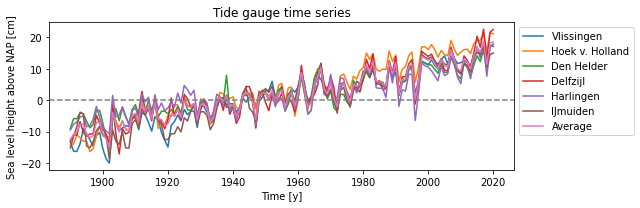

In [116]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [117]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [118]:
wind_data_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,4.733644,6.345675,9.164554,2.814705,7.602190,7.574831,6.372600,2.731458,3.180596,3.728501,1.950656,3.185383,3.380980,3.026262
1951,2.215220,3.094227,5.129766,1.345894,4.254703,3.909268,3.324846,4.189133,4.875644,6.217201,2.589350,4.982398,5.261225,4.685825
1952,3.140214,4.201388,7.262647,2.741641,6.585569,5.366155,4.882936,0.754191,0.748247,0.540864,0.799019,0.620607,0.670609,0.688923
1953,2.692977,3.829823,6.808114,2.271224,5.938963,4.985612,4.421119,1.657496,1.953852,2.634877,1.285330,2.170539,2.212620,1.985786
1954,8.065403,10.580028,14.525902,3.746828,11.332446,12.414601,10.110868,1.852473,2.051144,2.859851,2.389015,2.856825,2.352618,2.393654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2.870005,3.364094,4.651558,1.689992,4.181081,3.813334,3.428344,1.896073,2.166514,2.891788,1.476865,2.518330,2.388465,2.223006
2017,5.444768,7.589746,12.106847,3.815765,9.986858,9.524419,8.078067,1.284091,1.384115,1.738423,1.651508,1.608859,1.481535,1.524755


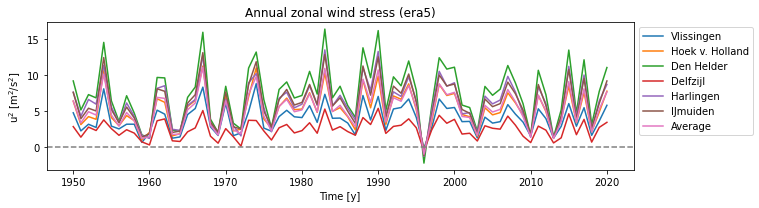

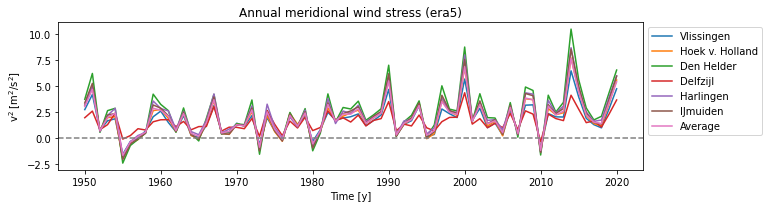

In [119]:
figs.plot_obs_wind_data(wind_data_era5, model, data_type = data_type)

### Perform regression

In [120]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, data_type = data_type)

In [121]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.766690,0.141310,0.116640,0.139282,2.421714,7.348812,1.428713,0.199777,3.983834
Hoek v. Holland,0.880155,0.137631,0.163831,0.107454,2.280582,9.960944,2.402770,-0.321854,5.677634
Den Helder,0.786855,0.316024,0.298392,0.129884,2.406303,6.357774,2.481082,0.176064,3.599399
Delfzijl,0.839420,0.273257,0.254551,0.173667,2.645677,7.614678,2.838530,0.241951,4.994772
Harlingen,0.773710,0.390423,0.361509,0.148601,2.640553,5.832838,2.987030,0.335224,3.458316
IJmuiden,0.751463,0.222885,0.198856,0.143432,2.575924,7.142322,1.982451,0.221024,3.776720
Average,0.847561,0.254710,0.244548,0.146569,2.150631,7.376230,2.374081,0.100291,4.258005


In [122]:
timeseries_era5

Vlissingen                                          Hoek v. Holland  \
          u$^2$     v$^2$     trend     total wind total           u$^2$   
time                                                                       
1950   0.595668  0.140698 -6.803691 -6.067325   0.736366        1.101980   
1951  -1.280657  0.341061 -6.609300 -7.548896  -0.939596       -1.921213   
1952  -0.591500 -0.131086 -6.414909 -7.137495  -0.722586       -0.891776   
1953  -0.924709 -0.006923 -6.220518 -7.152150  -0.931632       -1.237256   
1954   3.077959  0.019878 -6.026126 -2.928290   3.097837        5.039077   
...         ...       ...       ...       ...        ...             ...   
2016  -0.792817  0.025871  6.026126  5.259180  -0.766946       -1.670291   
2017   1.125483 -0.058249  6.220518  7.287752   1.067235        2.258716   
2018  -1.737357 -0.100415  6.414909  4.577137  -1.837772       -2.845018   
2019  -0.247178  0.150177  6.609300  6.512298  -0.097002       -0.292597   
2020   1.372578  0.416812  6.803691  8.593082   1.789391        2.397814   

                                                ...  IJmuiden            \
         v$^2$     trend      total wind total  ...     u$^2$     v$^2$   
time                                            ...                       
1950 -0.231351 -9.696407  -8.825778   0.870629  ...  0.918373  0.147764   
1951 -0.539627 -9.419367 -11.880206  -2.460840  ... -1.416992  0.360777   
1952  0.211017 -9.142326  -9.823085  -0.680759  ... -0.488795 -0.159294   
1953 -0.008245 -8.865286 -10.110787  -1.245501  ... -0.731243  0.015401   
1954 -0.025939 -8.588246  -3.575108   5.013138  ...  4.001837  0.031261   
...        ...       ...        ...        ...  ...       ...       ...   
2016 -0.046921  8.588246   6.871034  -1.717212  ... -1.478112  0.035322   
2017  0.095372  8.865286  11.219375   2.354089  ...  2.160474 -0.067424   
2018  0.135400  9.142326   6.432708  -2.709618  ... -2.289537 -0.083060   
2019 -0.253939  9.419367   8.872830  -0.546536  ... -0.049739  0.183991   
2020 -0.667944  9.696407  11.426277   1.729870  ...  1.930832  0.438598   

                                      Average                                \
         trend     total wind total     u$^2$     v$^2$     trend     total   
time                                                                          
1950 -6.449978 -5.383841   1.066137  1.053046  0.061750 -7.271928 -6.157132   
1951 -6.265693 -7.321908  -1.056215 -1.703778  0.159671 -7.064159 -8.608266   
1952 -6.081408 -6.729497  -0.648089 -0.294419 -0.076162 -6.856389 -7.226970   
1953 -5.897123 -6.612965  -0.715842 -0.712152  0.000358 -6.648620 -7.360414   
1954 -5.712838 -1.679740   4.033098  4.434468  0.024424 -6.440850 -1.981958   
...        ...       ...        ...       ...       ...       ...       ...   
2016  5.712838  4.270047  -1.442790 -1.610160  0.014355  6.440850  4.845046   
2017  5.897123  7.990173   2.093050  2.595713 -0.026844  6.648620  9.217489   
2018  6.081408  3.708811  -2.372597 -2.835330 -0.034737  6.856389  3.986322   
2019  6.265693  6.399945   0.134252  0.012971  0.083575  7.064159  7.160705   
2020  6.449978  8.819409   2.369431  2.193146  0.202498  7.271928  9.667572   

                 
     wind total  
time             
1950   1.114796  
1951  -1.544107  
1952  -0.370581  
1953  -0.711794  
1954   4.458892  
...         ...  
2016  -1.595805  
2017   2.568869  
2018  -2.870067  
2019   0.096546  
2020   2.395644  

[71 rows x 35 columns]

In [123]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

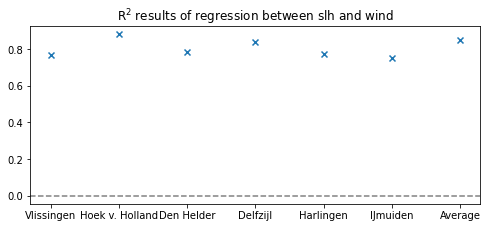

In [124]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

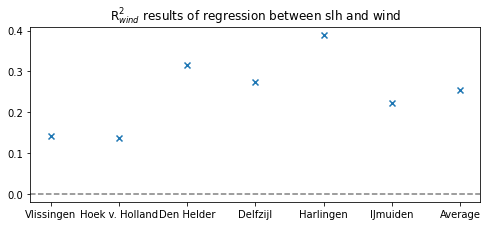

In [125]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, data_type)

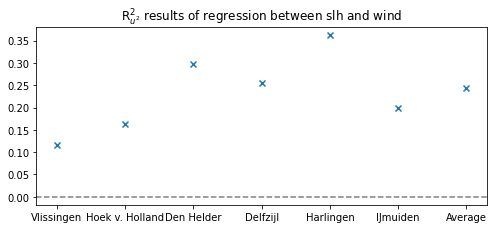

In [126]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{u^2}$', model, data_type)

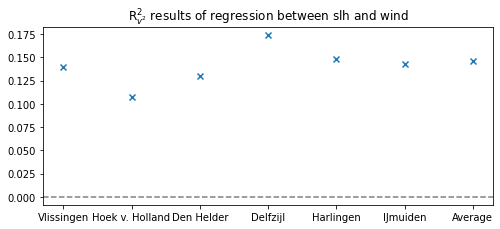

In [127]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{v^2}$', model, data_type)

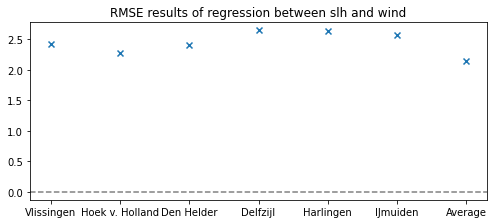

In [128]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

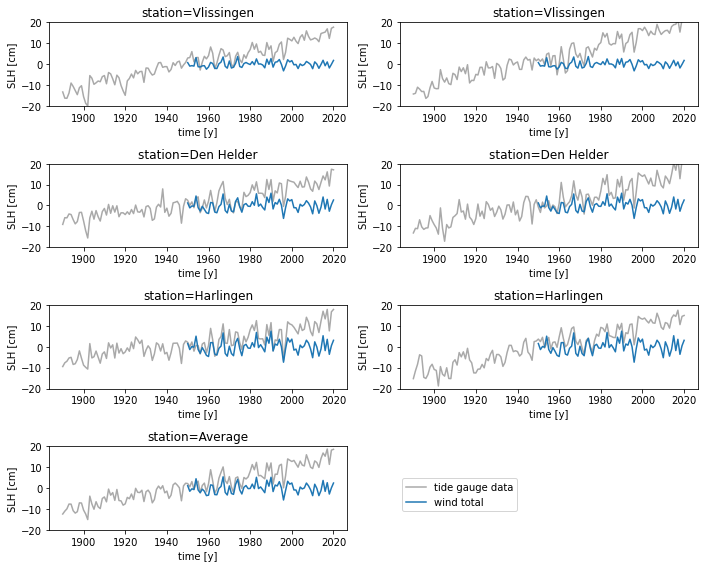

In [129]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, data_type)

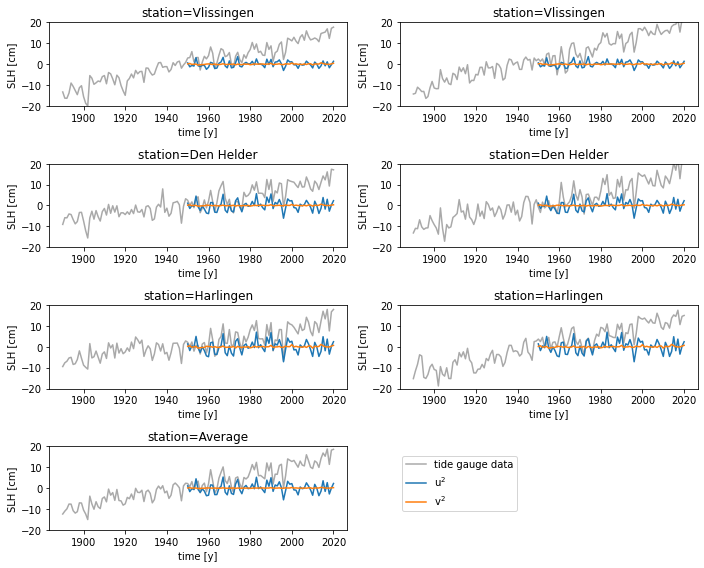

In [130]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$'], model, data_type)

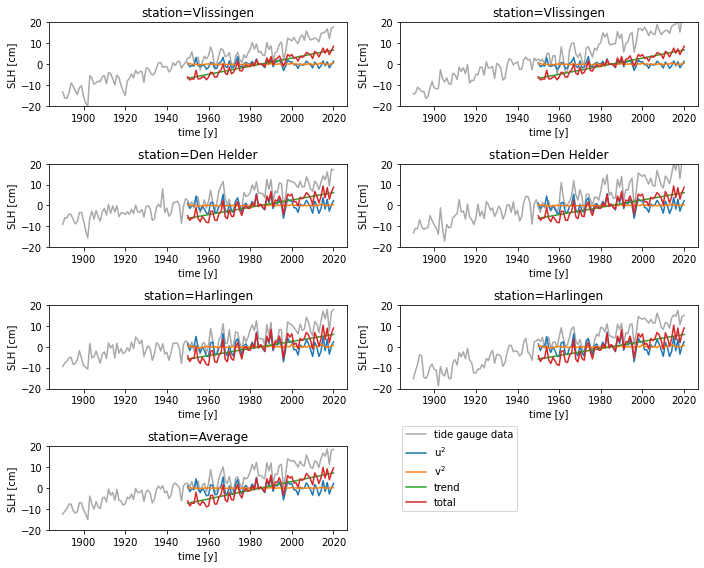

In [131]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$', 'trend', 'total'], model, data_type)

#### Plot trends

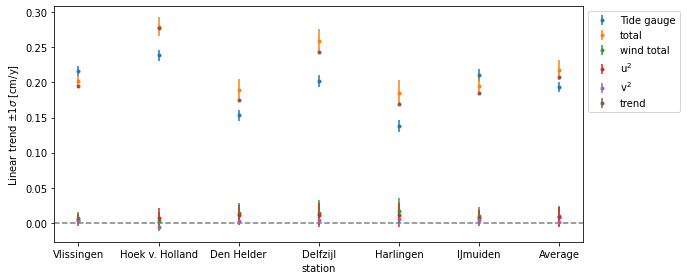

In [132]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, data_type)

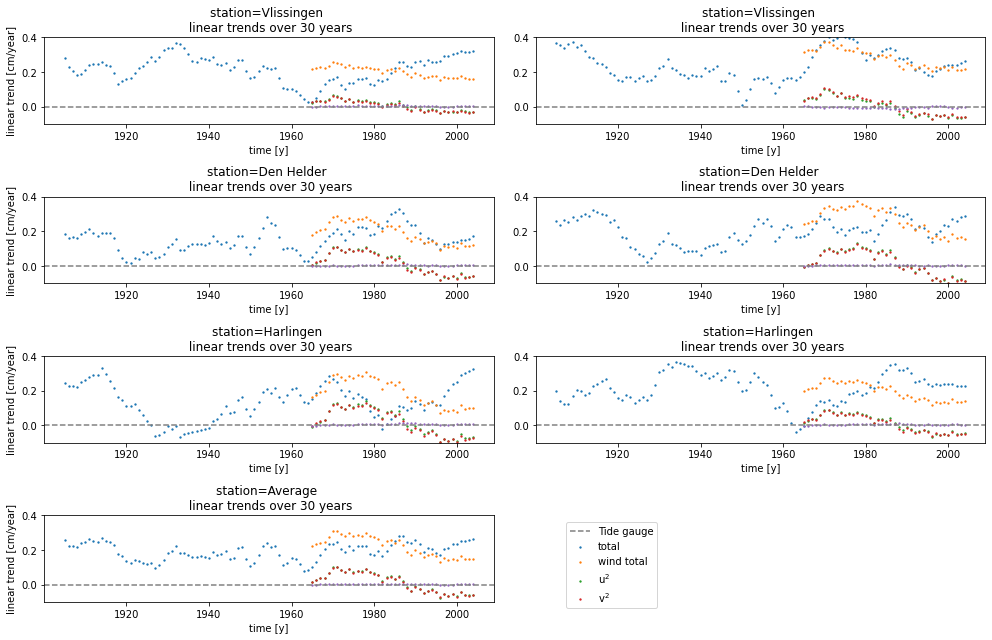

In [133]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [134]:
data_type = '20cr'

#### Import and plot nearby wind data

In [135]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [136]:
wind_data_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1836,4.280736,6.584667,6.910478,3.727988,6.910478,4.516213,5.488427,2.079730,1.016261,0.396981,1.251174,0.396981,1.418657,1.093297
1837,1.353248,2.056189,2.076946,1.076460,2.076946,1.381128,1.670153,1.122225,1.440843,1.660021,1.087890,1.660021,1.043204,1.335701
1838,1.357986,-0.019153,-0.999386,0.330283,-0.999386,0.568622,0.039828,0.384786,-0.146213,-0.360937,0.324903,-0.360937,0.185538,0.004523
1839,1.817033,2.099380,1.256711,0.643964,1.256711,1.390687,1.410748,1.244798,1.163936,1.244915,0.949601,1.244915,0.941078,1.131540
1840,3.037146,5.090846,6.790268,4.106853,6.790268,3.778630,4.932335,0.997329,0.042540,-0.715971,0.764537,-0.715971,0.632816,0.167546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,3.357691,7.801598,10.394631,4.502903,10.394631,4.635073,6.847754,2.739325,3.458502,3.940963,2.823585,3.940963,2.581144,3.247414
2012,3.146897,6.454442,8.370232,3.828953,8.370232,3.846449,5.669534,2.953365,3.146500,2.973744,2.748808,2.973744,2.743556,2.923286


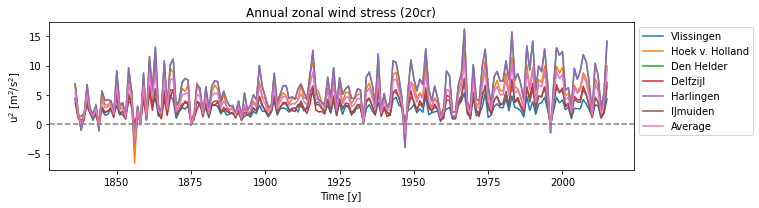

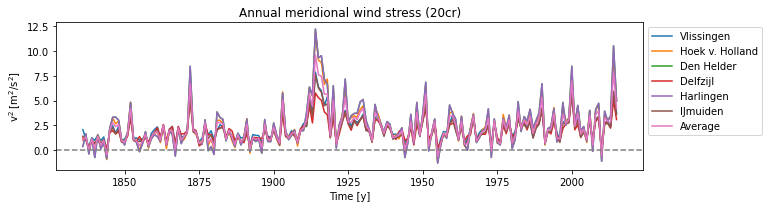

In [137]:
figs.plot_obs_wind_data(wind_data_20cr, model=model, data_type = data_type)

### Perform regression

In [138]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [139]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.895990,0.080744,0.080635,0.004802,2.683899,-5.430029,1.393849,-0.004802,10.852129
Hoek v. Holland,0.924181,0.219260,0.225448,0.011345,2.514544,-3.731218,2.086252,0.230864,11.412937
Den Helder,0.848205,0.396761,0.399049,0.013047,2.459551,-2.434703,2.403769,0.223340,6.467681
Delfzijl,0.892571,0.351756,0.349490,0.048223,2.610822,-3.903748,2.629362,0.672107,8.778081
Harlingen,0.835718,0.491662,0.489980,0.036175,2.420168,-1.896139,2.831504,0.571003,5.320933
IJmuiden,0.867390,0.195493,0.204336,0.021845,3.059213,-5.404718,1.739518,0.431473,10.190449
Average,0.922611,0.304097,0.310216,0.018473,2.073719,-3.787759,2.193097,0.317208,8.800289


In [140]:
timeseries_20cr

Vlissingen                                            Hoek v. Holland  \
          u$^2$     v$^2$      trend      total wind total           u$^2$   
time                                                                         
1836   1.900202  0.000387 -18.692303 -16.791714   1.900589        1.250913   
1837  -1.341486  0.004021 -18.483451 -19.820916  -1.337465       -2.118177   
1838  -1.336239  0.006819 -18.274598 -19.604018  -1.329420       -3.662187   
1839  -0.827924  0.003556 -18.065745 -18.890114  -0.824369       -2.086044   
1840   0.523141  0.004495 -17.856893 -17.329257   0.527636        0.139542   
...         ...       ...        ...        ...        ...             ...   
2011   0.878089 -0.002116  17.856893  18.732865   0.875972        2.156283   
2012   0.644671 -0.002929  18.065745  18.707488   0.641743        1.154028   
2013  -1.656030 -0.000607  18.274598  16.617961  -1.656637       -2.085957   
2014  -0.742885 -0.013937  18.483451  17.726628  -0.756822       -0.317100   
2015   1.973873 -0.006039  18.692303  20.660137   1.967834        3.784607   

                                                 ...  IJmuiden            \
         v$^2$      trend      total wind total  ...     u$^2$     v$^2$   
time                                             ...                       
1836 -0.153637 -19.658270 -18.560994   1.097276  ...  1.381412 -0.183166   
1837 -0.105155 -19.438624 -21.661956  -2.223331  ... -1.839446 -0.310060   
1838 -0.286379 -19.218979 -23.167545  -3.948566  ... -2.674181 -0.599932   
1839 -0.136774 -18.999333 -21.222152  -2.222818  ... -1.829625 -0.344577   
1840 -0.264826 -18.779688 -18.904971  -0.125283  ...  0.623649 -0.448762   
...        ...        ...        ...        ...  ...       ...       ...   
2011  0.125241  18.779688  21.061212   2.281524  ...  1.503523  0.209728   
2012  0.089613  18.999333  20.242975   1.243642  ...  0.693324  0.264619   
2013  0.094868  19.218979  17.227889  -1.991089  ... -1.987499  0.132640   
2014  0.807389  19.438624  19.928913   0.490289  ... -0.976595  1.345991   
2015  0.305905  19.658270  23.748782   4.090512  ...  3.433928  0.553772   

                                        Average                       \
          trend      total wind total     u$^2$     v$^2$      trend   
time                                                                   
1836 -17.552588 -16.354342   1.198246  1.079567 -0.216950 -15.158100   
1837 -17.356470 -19.505976  -2.149506 -2.411064 -0.170504 -14.988736   
1838 -17.160352 -20.434465  -3.274113 -3.901492 -0.425570 -14.819372   
1839 -16.964233 -19.138435  -2.174202 -2.648210 -0.209623 -14.650007   
1840 -16.768115 -16.593228   0.174887  0.571193 -0.394333 -14.480643   
...         ...        ...        ...       ...       ...        ...   
2011  16.768115  18.481366   1.713251  2.322252  0.195799  14.480643   
2012  16.964233  17.922176   0.957943  1.245134  0.133693  14.650007   
2013  17.160352  15.305493  -1.854859 -2.274038  0.117562  14.819372   
2014  17.356470  17.725866   0.369396 -0.667129  1.084211  14.988736   
2015  17.552588  21.540288   3.987700  4.640056  0.385755  15.158100   

                            
          total wind total  
time                        
1836 -14.295483   0.862617  
1837 -17.570304  -2.581568  
1838 -19.146434  -4.327062  
1839 -17.507840  -2.857833  
1840 -14.303783   0.176860  
...         ...        ...  
2011  16.998694   2.518051  
2012  16.028835   1.378827  
2013  12.662895  -2.156477  
2014  15.405818   0.417082  
2015  20.183911   5.025811  

[180 rows x 35 columns]

In [141]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,False,False,False,True,True,False,False
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

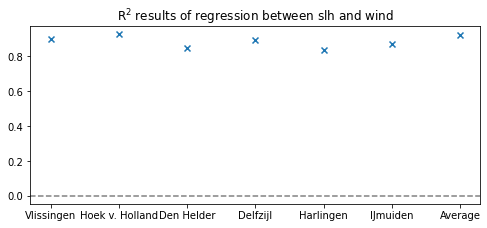

In [142]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

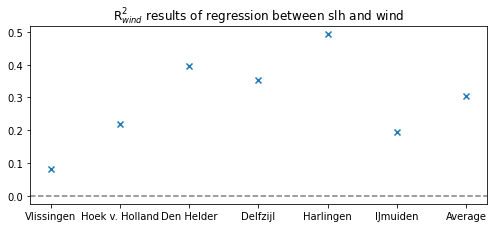

In [143]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, data_type)

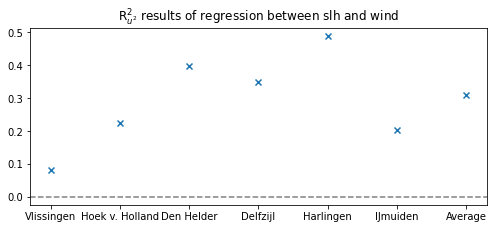

In [144]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{u^2}$', model, data_type)

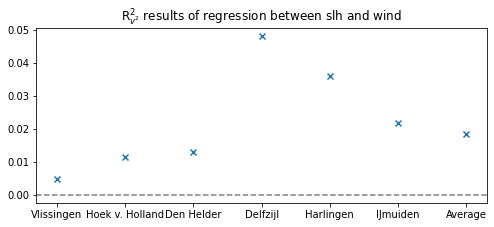

In [145]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{v^2}$', model, data_type)

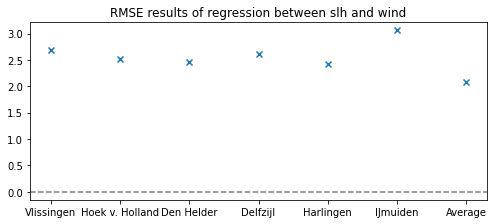

In [146]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

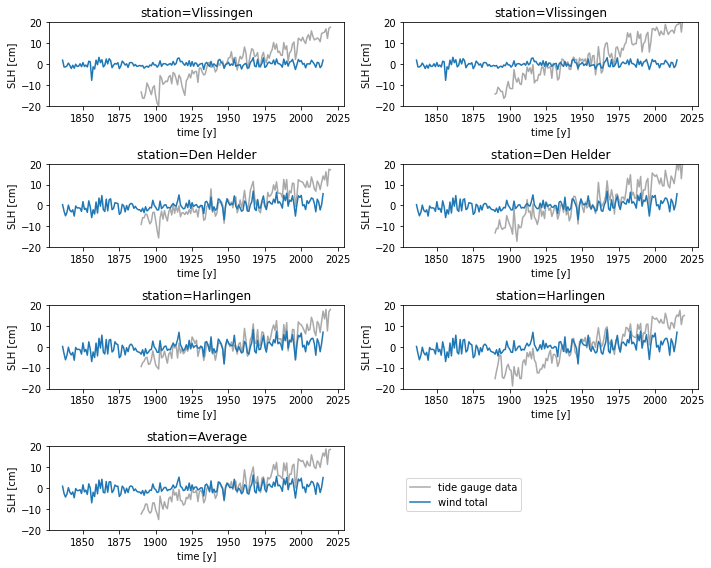

In [147]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, data_type)

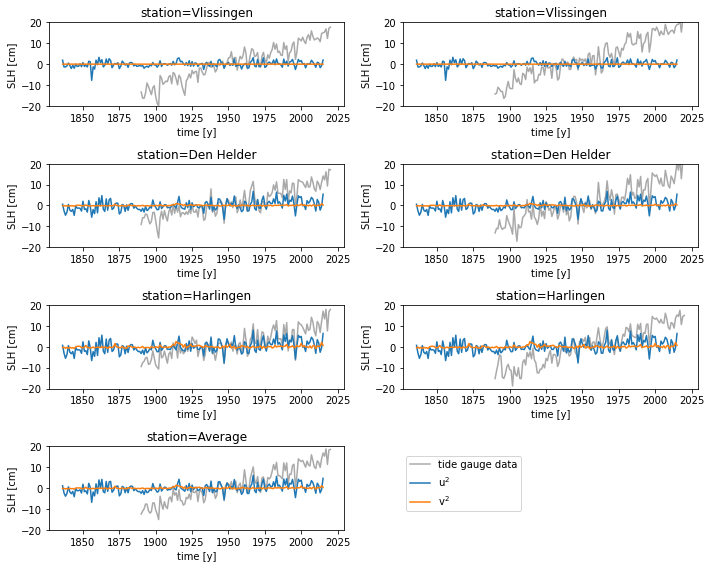

In [148]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$'], model, data_type)

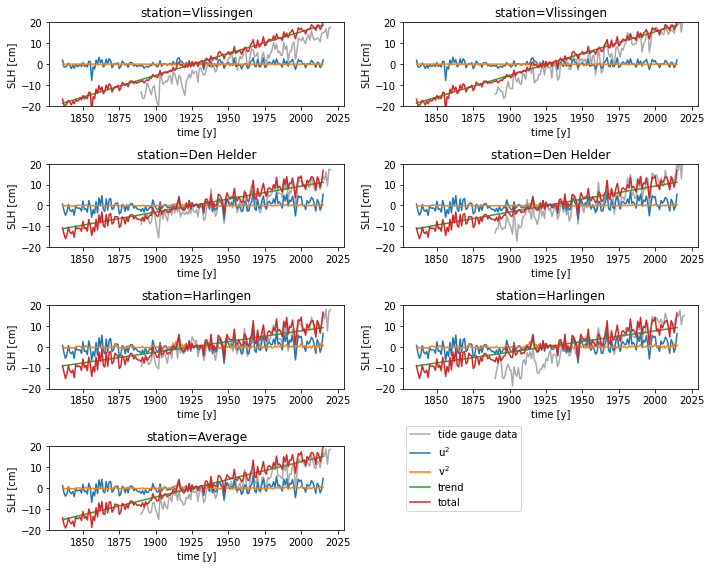

In [149]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$', 'trend', 'total'], model, data_type)

#### Plot trends

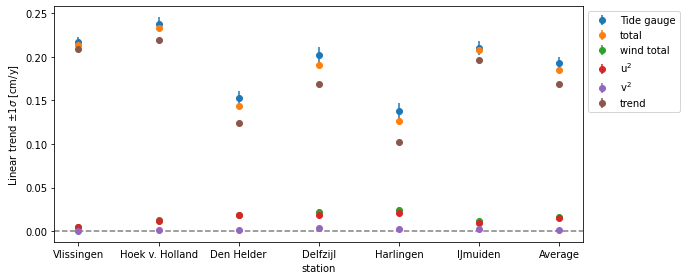

In [153]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, data_type)

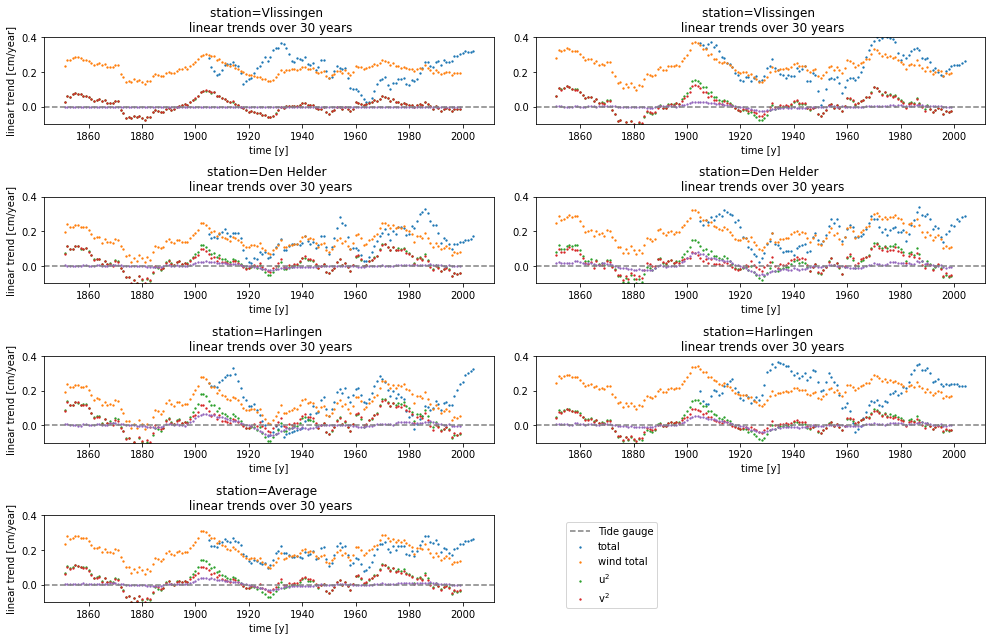

In [151]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, data_type, errorbar = False)